# Approximation of π Using Different Methods

In [60]:
import time
import random
import math
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
# Leibniz Series
def calculate_pi_leibniz(n_terms):
    pi_approx = 0
    for k in range(n_terms):
        term = (-1)**k / (2*k + 1)
        pi_approx += term
    return 4 * pi_approx

# Monte Carlo Method
def calculate_pi_mc(n_points):
    inside_circle = 0
    for _ in range(n_points):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
    return 4 * inside_circle / n_points

# Wallis Product Formula
def calculate_pi_wallis(n_terms):
    pi_approx = 1
    for n in range(1, n_terms + 1):
        pi_approx *= (4 * n ** 2) / (4 * n ** 2 - 1)
    return pi_approx * 2

# Chudnovsky Algorithm
def calculate_pi_chudnovsky(n_terms):
    C = 426880 * math.sqrt(10005)
    M = 1
    L = 13591409
    X = 1
    K = 6
    S = L
    for i in range(1, n_terms):
        M = (M * (K ** 3 - 16 * K)) // (i ** 3)
        L += 545140134
        X *= -262537412640768000
        S += (M * L) // X
        K += 12
    return C / S

# Buffon Needle Method
def estimate_pi_buffon(needle_length, line_distance, num_throws):
    if needle_length > line_distance:
        raise ValueError("Needle length must be less than or equal to the distance between lines.")
    
    crosses = 0
    for _ in range(num_throws):
        d = random.uniform(0, line_distance / 2)
        theta = random.uniform(0, math.pi / 2)
        if d <= (needle_length / 2) * math.sin(theta):
            crosses += 1

    if crosses == 0:
        return None

    return (2 * needle_length * num_throws) / (crosses * line_distance)


In [62]:
methods = []
estimates = []
errors = []
times = []

true_pi = math.pi

# Run each method and collect results
def record_result(name, func, arg):
    start = time.time()
    pi_val = func(arg)
    end = time.time()
    if pi_val:
        methods.append(name)
        estimates.append(pi_val)
        errors.append(abs(true_pi - pi_val))
        times.append(end - start)

record_result("Leibniz", calculate_pi_leibniz, 10000)
record_result("Monte Carlo", calculate_pi_mc, 100000)
record_result("Wallis", calculate_pi_wallis, 10000)
record_result("Chudnovsky", calculate_pi_chudnovsky, 2)
record_result("Buffon Needle", lambda n: estimate_pi_buffon(1.0, 1.0, n), 100000)


In [63]:
df = pd.DataFrame({
    "Method": methods,
    "Estimated π": estimates,
    "Error": errors,
    "Time (s)": times
})

df


,Method,Estimated π,Error,Time (s)
0,Leibniz,3.141493,1.000000e-04,0.006981
1,Monte Carlo,3.141400,1.926536e-04,0.133587
2,Wallis,3.141514,7.853491e-05,0.000000
3,Chudnovsky,3.141593,2.311454e-07,0.000000
4,Buffon Needle,3.142332,7.392709e-04,0.124929


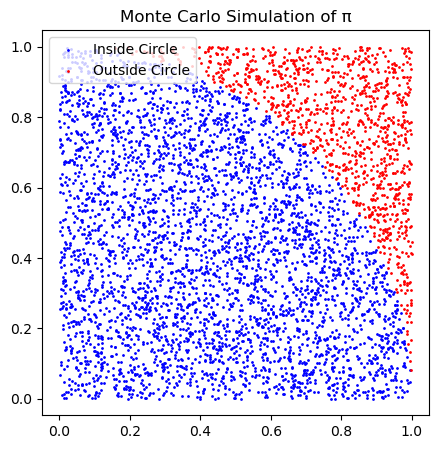

In [64]:
x_in, y_in = [], []
x_out, y_out = [], []

for _ in range(5000):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    if x**2 + y**2 <= 1:
        x_in.append(x)
        y_in.append(y)
    else:
        x_out.append(x)
        y_out.append(y)

plt.figure(figsize=(5, 5))
plt.scatter(x_in, y_in, color='blue', s=1, label="Inside Circle")
plt.scatter(x_out, y_out, color='red', s=1, label="Outside Circle")
plt.legend()
plt.title("Monte Carlo Simulation of π")
plt.axis("equal")
plt.show()
